In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
%matplotlib inline
import os
import seaborn as sns


In [3]:
os.chdir('C:\\Users\\v-paszaf\\Desktop')

In [4]:
df =pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [7]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2945844,230,CASH_IN,330076.57,C453426449,2892526.76,3222603.33,C407371483,2481392.23,2151315.65,0,0
2372638,191,PAYMENT,76.34,C837808046,0.00,0.00,M2079775653,0.00,0.00,0,0
5636207,396,PAYMENT,33080.47,C1440925244,0.00,0.00,M92310568,0.00,0.00,0,0
667867,36,CASH_IN,378257.21,C765628198,1099233.53,1477490.74,C2675890,3959100.77,3580843.56,0,0
549597,21,CASH_IN,296577.21,C1073549256,2076.00,298653.21,C38146829,0.00,0.00,0,0
5289281,373,PAYMENT,13737.55,C1407214759,21153.00,7415.45,M21908578,0.00,0.00,0,0
2235174,186,CASH_OUT,87934.64,C1581177409,52122.00,0.00,C448221648,3738013.87,3825948.50,0,0
2511822,205,CASH_OUT,161825.08,C208277430,0.00,0.00,C923805107,480766.40,642591.49,0,0
4087712,301,PAYMENT,34684.67,C2080731126,0.00,0.00,M941282258,0.00,0.00,0,0
3082374,235,PAYMENT,8937.74,C1355473966,0.00,0.00,M1661646528,0.00,0.00,0,0


In [9]:
df['type'].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
df2 = pd.get_dummies(df['type'])

In [13]:
df = pd.concat([df,df2], axis=1)

In [15]:
df = df.drop(['type', 'step', 'nameDest', 'nameOrig'], axis = 1)

In [17]:
df.sample(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
5083857,33010.51,0.0,0.00,1412837.54,1445848.05,0,0,0,1,0,0,0
5469490,287841.99,0.0,0.00,3305034.48,3592876.46,0,0,0,0,0,0,1
4408234,120195.00,9053.0,0.00,34659.11,154854.12,0,0,0,1,0,0,0
6336677,11126.73,0.0,0.00,0.00,0.00,0,0,0,0,0,1,0
4750498,77670.67,9538.0,87208.67,0.00,0.00,0,0,1,0,0,0,0


In [18]:
X = df.drop(['isFraud'], axis = 1).values
y = df['isFraud']

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X =sc.fit_transform(X)

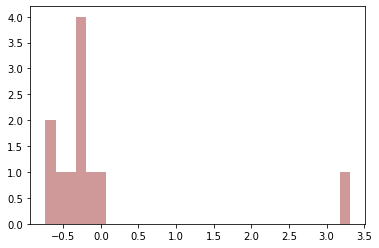

In [34]:
sns.distplot(X[2],kde=False,color='darkred',bins=30)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
predictions = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.91      0.40      0.56      2666

    accuracy                           1.00   2099665
   macro avg       0.96      0.70      0.78   2099665
weighted avg       1.00      1.00      1.00   2099665



[[2096897     102]
 [   1592    1074]]


In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
logreg2=LogisticRegression(C=,penalty="")
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))